In [2]:
import pandas as pd
import numpy as np
import os
import math
import tushare as ts
pro = ts.pro_api('35d8848b876df93910413e8936c40745d7b7da42553ae73920862cd9')

### 获取2支股票的历史价格时间序列

In [3]:
start_date = '20200101'
end_date = '20200301'
ts_1_code = '000001.SZ'
ts_2_code = '000004.SZ'

stock_1_price = pro.query('daily', ts_code=ts_1_code, start_date=start_date, end_date=end_date)

stock_2_price = pro.query('daily', ts_code=ts_2_code, start_date=start_date, end_date=end_date)

stock_1_price.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20200228,14.85,15.04,14.46,14.50,15.11,-0.61,-4.0371,1300644.45,1906892.413
1,000001.SZ,20200227,14.96,15.15,14.89,15.11,14.99,0.12,0.8005,975270.90,1464605.739
2,000001.SZ,20200226,14.77,15.27,14.70,14.99,15.04,-0.05,-0.3324,1176599.15,1769612.245
3,000001.SZ,20200225,15.00,15.13,14.78,15.04,15.23,-0.19,-1.2475,1144575.02,1710369.786
4,000001.SZ,20200224,15.46,15.46,15.15,15.23,15.58,-0.35,-2.2465,1191794.50,1820183.854


### 计算000001.SZ的对数收益

In [28]:
stock_1_price = stock_1_price[::-1]  # 按时间升序展示

stock_1_price['index'] = ['0'] * len(stock_1_price['close'])  # 若不存在index则使用该方法填充
stock_1_price['next_close'] = stock_1_price.groupby('index')['close'].shift(-1)  # 生成next close值
stock_1_price = stock_1_price.drop(index=stock_1_price.index[-1])  # 删除最后一交易日（因不存在next close值）

logreturn = []
for i in stock_1_price.index:
    logreturn.append(math.log(stock_1_price['next_close'][i]/stock_1_price['close'][i]))

stock_1_price['logreturn'] = logreturn

stock_1_price

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,index,next_close,logreturn
-1,000001.SZ,20200227,14.96,15.15,14.89,15.11,14.99,0.12,0.8005,975270.90,1464605.739,0,14.99,-0.007973
0,000001.SZ,20200226,14.77,15.27,14.70,14.99,15.04,-0.05,-0.3324,1176599.15,1769612.245,0,15.04,0.003330
1,000001.SZ,20200225,15.00,15.13,14.78,15.04,15.23,-0.19,-1.2475,1144575.02,1710369.786,0,15.23,0.012554
2,000001.SZ,20200224,15.46,15.46,15.15,15.23,15.58,-0.35,-2.2465,1191794.50,1820183.854,0,15.58,0.022721
3,000001.SZ,20200221,15.49,15.72,15.45,15.58,15.59,-0.01,-0.0641,995071.02,1546692.930,0,15.59,0.000642
4,000001.SZ,20200220,15.27,15.62,15.10,15.59,15.24,0.35,2.2966,1235444.34,1897923.029,0,15.24,-0.022706
5,000001.SZ,20200219,15.10,15.37,15.08,15.24,15.20,0.04,0.2632,874106.93,1333730.218,0,15.20,-0.002628
6,000001.SZ,20200218,15.33,15.33,15.01,15.20,15.37,-0.17,-1.1061,973612.35,1478274.222,0,15.37,0.011122
7,000001.SZ,20200217,15.04,15.37,14.93,15.37,15.03,0.34,2.2621,1543696.01,2337993.586,0,15.03,-0.022369
8,000001.SZ,20200214,14.75,15.14,14.70,15.03,14.65,0.38,2.5939,1512434.73,2253906.452,0,14.65,-0.025608


### 计算皮尔逊相关系数

In [29]:
def multipl(a,b):
    sumofab = 0.0
    for i in range(len(a)):
        temp = a[i] * b[i]
        sumofab += temp
    return sumofab
 
def corrcoef(x,y):
    n = len(x)
    
    #求和
    sum1 = sum(x)
    sum2 = sum(y)
    
    #求乘积之和
    sumofxy = multipl(x,y)
    
    #求平方和
    sumofx2 = sum([pow(i,2) for i in x])
    sumofy2 = sum([pow(j,2) for j in y])
    num = sumofxy-(float(sum1)*float(sum2)/n)
    
    den = math.sqrt((sumofx2-float(sum1**2)/n)*(sumofy2-float(sum2**2)/n))
    
    return num/den

In [30]:
corrcoef(list(stock_1_price['logreturn']), list(stock_1_price['logreturn']))

1.0

### 计算000002.SZ的对数收益

In [31]:
stock_2_price = stock_2_price[::-1]  # 按时间升序展示

stock_2_price['index'] = ['0'] * len(stock_2_price['close'])  # 若不存在index则使用该方法填充
stock_2_price['next_close'] = stock_2_price.groupby('index')['close'].shift(-1)  # 生成next close值
stock_2_price = stock_2_price.drop(index=stock_2_price.index[-1])  # 删除最后一交易日（因不存在next close值）

logreturn = []
for i in stock_2_price.index:
    logreturn.append(math.log(stock_2_price['next_close'][i]/stock_2_price['close'][i]))

stock_2_price['logreturn'] = logreturn

stock_2_price

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,index,next_close,logreturn
1,000004.SZ,20200227,35.81,39.96,33.93,37.00,37.42,-0.42,-1.1224,192268.71,705851.089,0,37.42,0.011287
2,000004.SZ,20200226,38.21,39.55,37.42,37.42,41.58,-4.16,-10.0048,141673.94,540539.274,0,41.58,0.105414
3,000004.SZ,20200225,40.00,41.58,36.70,41.58,37.80,3.78,10.0000,279365.39,1111662.193,0,37.80,-0.095310
4,000004.SZ,20200224,37.80,37.80,37.80,37.80,34.36,3.44,10.0116,14243.09,53838.880,0,34.36,-0.095416
5,000004.SZ,20200221,34.00,34.36,33.00,34.36,31.24,3.12,9.9872,63137.42,215454.458,0,31.24,-0.095194
6,000004.SZ,20200220,29.37,31.24,25.56,31.24,28.40,2.84,10.0000,150919.04,435957.820,0,28.40,-0.095310
7,000004.SZ,20200219,26.84,28.40,26.84,28.40,25.82,2.58,9.9923,28798.11,80680.600,0,25.82,-0.095240
8,000004.SZ,20200218,24.88,25.82,23.70,25.82,23.47,2.35,10.0128,65499.14,162710.522,0,23.47,-0.095426
9,000004.SZ,20200217,22.05,23.47,21.91,23.47,21.34,2.13,9.9813,29755.20,68272.475,0,21.34,-0.095140
10,000004.SZ,20200214,21.49,21.78,21.16,21.34,21.30,0.04,0.1878,14508.00,31093.681,0,21.30,-0.001876


In [8]:
len(list(stock_1_price['logreturn']))

35

In [9]:
len(list(stock_2_price['logreturn']))

35

### 计算stock_1_price和stock_2_price的皮尔逊相关系数

In [10]:
corrcoef(list(stock_1_price['logreturn']), list(stock_2_price['logreturn']))

0.24605475817036795

### 计算stock_1_price和stock_2_price的余弦相似度(cosine_similarity)

In [13]:
stock_1_lr = stock_1_price['logreturn']
stock_2_lr = stock_2_price['logreturn']
cosine = np.dot(stock_1_lr, stock_2_lr) / (np.linalg.norm(stock_1_lr) * (np.linalg.norm(stock_2_lr)))
print(cosine)

0.17821427396241268


### 计算股票间动态时间规整距离

[0.0032511  0.00345505 0.00406615 0.0038912  0.00421065 0.0036387 ]
0
0.05550198981744351


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dtaidistance/dtw.py:428: RuntimeWarning: invalid value encountered in sqrt
  dtw = np.sqrt(dtw)


(<Figure size 720x720 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

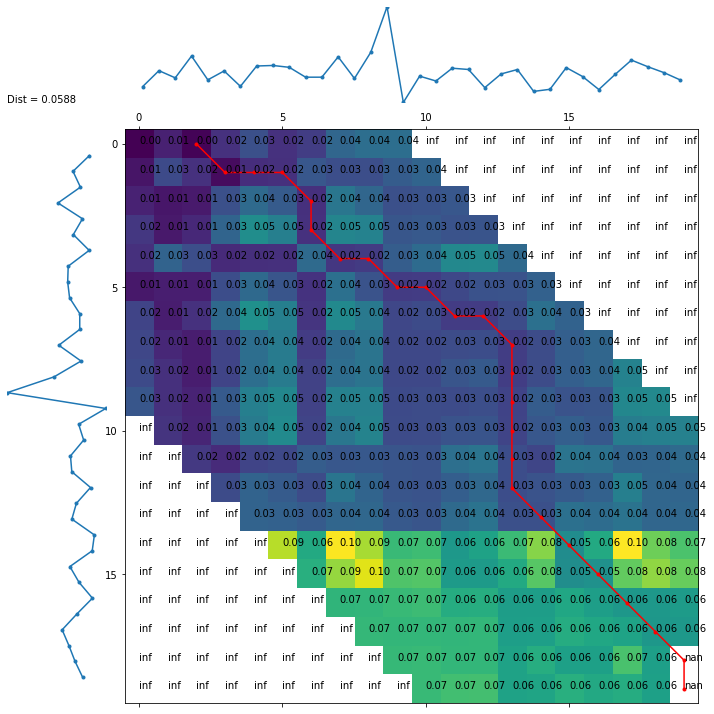

In [43]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

path1, path2 = "../data/000001.XSHE.csv", "../data/000063.XSHE.csv"
feature = "rclose"
length = 20
window, psi = 10, 5

rc1, rc2 = pd.read_csv(path1)[feature][:length],pd.read_csv(path2)[feature][:length]
dis, paths = dtw.warping_paths(rc1, rc2, window=window, psi=psi)

# 动态时间规整距离
print(dis)

# 绘图（输出形式）
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(stock_1_lr, stock_2_lr, paths, best_path,shownumbers=True)

# 绘图（保存）
# path = dtw.warping_path(stock_1_lr, stock_2_lr)
# dtwvis.plot_warping(stock_1_lr, stock_2_lr, path, filename="wrapping.png")